In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
yelp = pd.read_csv('./datasets/summarized.csv')
irs = pd.read_csv('./datasets/affluence.csv')

In [3]:
yelp.shape

(2655, 20)

In [4]:
irs.shape

(1481, 3)

In [5]:
yelp = yelp[yelp['count']>20]

In [6]:
yelp.shape

(1149, 20)

In [7]:
yelp[yelp['zip_code']==90210]

,Unnamed: 0,zip_code,count,latitude,longitude,Price_1,Price_2,Price_3,Price_4,Rating_1,Rating_1.5,Rating_2,Rating_2.5,Rating_3,Rating_3.5,Rating_4,Rating_4.5,Rating_5,count_businesses,city
70,70,90210,56,34.069403,-118.404573,2,28,13,13,0,0,0,0,2,16,26,12,0,56,Beverly Hills


In [8]:
yelp['price'] = (yelp['Price_1']+2*yelp['Price_2']+3*yelp['Price_3']+4*yelp['Price_4'])/yelp['count']

In [9]:
yelp.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
irs.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
irs['zip']=irs['zip'].astype(int)

In [12]:
irs.rename(columns={'zip':'zip_code'},inplace=True)

In [13]:
yelp=yelp.merge(irs)

In [14]:
X = yelp[['price']]
y = yelp['category']
lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)
lr.score(X, y)

0.3917280702046486

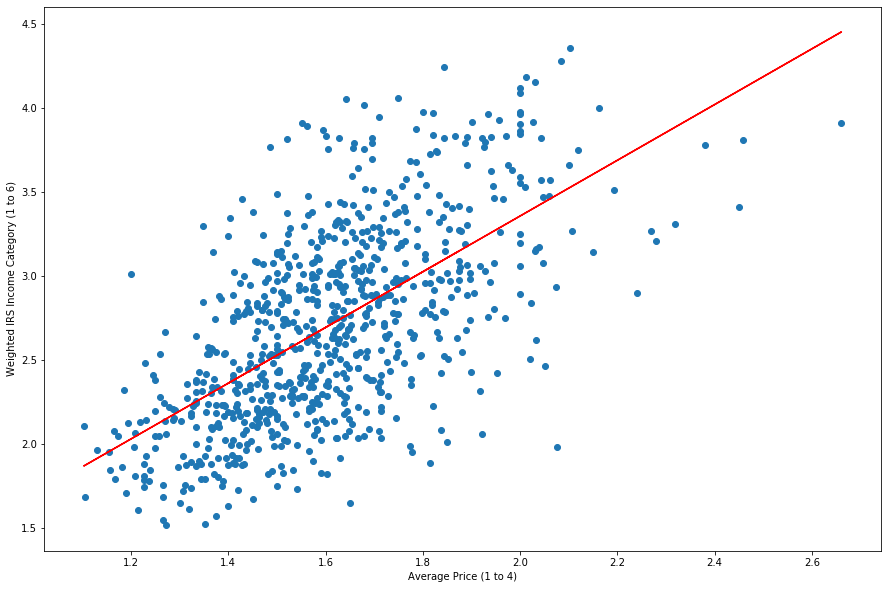

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(X, y)
plt.xlabel('Average Price (1 to 4)')
plt.ylabel('Weighted IRS Income Category (1 to 6)')
plt.plot(X, predictions, color='r');